In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import datetime as dt

# PLAYLISTS





### Danh sách mong đợi: 
- Sự phân bố của các biến chính, ở đây khi nhìn vào các biến có kiểu dữ liệu là số, bao gồm `duration`,`likes_count`, `reposts_count`, `track_count` tụi em mong muốn rằng gần như giá trị của các biến này đều sẽ trên mức trung bình, có thể một số vị trí ít hơn hoặc thấp hơn giá trị trung bình (có hình tương tự như hình tháp). 
- Mối quan hệ/ tương quan giữa các cặp biến, ở đây tụi em đặt câu hỏi liệu có sự tương quan nào giữa các cặp biến `reposts_count` - `likes_count`, `track_count` - `duration`hay không? 
    - `reposts_count` - `likes_count`: có phải những playlist có lượt repost (đăng tải lại) càng nhiều thì lượt like (thích) của chúng càng nhiều không? 
    - `track_count` - `duration`: số lượng các track có trong 1 playlist có ảnh hưởng gì đến thời lượng của playlist này hay không?

### Danh sách kiểm tra phân tích dữ liệu

### Trả lời những câu hỏi về bộ dữ liệu: 
1. Bạn đã xác định số liệu trước khi bắt đầu?
2. Bạn đã hiểu ngữ cảnh cho câu hỏi và ứng dụng?
3. Bạn đã xem xét liệu câu hỏi có thể được trả lời với dữ liệu có sẵn
không?

- Xác định số liệu trước khi bắt đầu: 
   - Thực hiện tổng quan về dữ liệu: thực hiện tìm hiểu ý nghĩa các cột dữ liệu, ở đây tụi em dựa trên nội dung hiểu và tài liệu 'SoundCloud Public API Specification' để đưa nội dung của các trường dữ liệu. 
- Thực hiện tổng quan về dữ liệu.


In [2]:
df=pd.read_csv("playlist.csv")
df

,id,artwork_url,created_at,description,duration,genre,label_name,last_modified,likes_count,managed_by_feeds,...,reposts_count,secret_token,tag_list,title,user_id,is_album,display_date,user,tracks,track_count
0,1,https://i1.sndcdn.com/artworks-000000009550-e6...,2008-04-29T22:14:25Z,A collection of old sounds,826086,None,None,2012-07-23T07:46:33Z,6,False,...,3,None,None,Old things,8,False,2008-04-29T22:14:25Z,8,"43,274,53787294",3
1,18,https://i1.sndcdn.com/artworks-000067273270-ui...,2008-04-30T01:21:15Z,My 2003 debut album made on the road with a la...,3247119,Electronic,sonarkollektiv,2021-07-21T10:53:42Z,1541,False,...,262,None,downtempo sampling beats,Soulhack,183,True,2008-04-30T01:21:15Z,183,"290,291,292,293,294,295,296,297,298,299,300",11
2,32,None,2008-05-01T04:12:43Z,artist / noe\r\n,354742,ambient pop,Floor Limit,2015-10-13T13:39:25Z,2,False,...,0,None,"ambient electronica IDM electropop japan ""girl...",noe - a beautiful world,1691,True,2008-05-01T04:12:43Z,1691,None,0
3,33,None,2008-05-01T04:13:55Z,None,254066,abstract hip-hop,Floor Limit,2015-10-13T13:35:10Z,1,False,...,0,None,"""hip hop"" abstract breakbeats",AKT THE JN - MIDNIGHT RAVERS RIDE ON,1691,True,2008-05-01T04:13:55Z,1691,4795,1
4,34,None,2008-05-01T17:31:06Z,None,50620378,None,None,2021-10-16T14:55:49Z,1,False,...,0,None,None,Dj Mixes,2157,False,2008-05-01T17:31:06Z,2157,"859159762,438021198,274210741,274210163,215133...",10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1503,7108,https://i1.sndcdn.com/artworks-000002529884-vm...,2009-02-10T11:05:47Z,here are some tracks i've made between 2000 an...,4467209,None,None,2011-11-17T13:31:16Z,0,False,...,0,None,minimal jazzy swing progressive electro house ...,roman hoff,70493,False,2009-02-10T11:05:47Z,70493,"24212819,17847345,17847346,4008672,5369858,140...",12
1504,7110,None,2009-02-10T11:29:16Z,www.wearemonsters.net,351503,Italio Disco,None,2009-06-30T17:45:35Z,0,False,...,0,None,funk disco house keytar sexy beats italio groo...,We Are Monsters - DJ Set,3577,False,2009-02-10T11:29:16Z,3577,13974,1
1505,7114,https://i1.sndcdn.com/artworks-000000273438-f0...,2009-02-10T12:13:47Z,A rootsy exploration of coming into one's own ...,217025,None,Independent,2015-10-13T13:39:30Z,0,False,...,0,None,roots folk banjo,Boom,70736,False,2009-02-10T12:13:47Z,70736,None,0
1506,7115,https://i1.sndcdn.com/artworks-000000273483-c3...,2009-02-10T12:51:08Z,None,4869900,Electronic Ambient,Sigma,2009-04-20T12:26:57Z,11,False,...,1,None,electronic ambient analog,Ambient Radio,70740,True,2009-02-10T12:51:08Z,70740,"141689,141690,141691,181321,234740,234742",6


## Tổng quan về dữ liệu

Ý nghĩa các cột dữ liệu

In [3]:
filename="playlist_schema_short.csv"
with open(filename,'r',encoding='utf-8') as file:
    col_meaning_df=pd.read_csv(file,sep=',').set_index('Column')
    pd.set_option("max_colwidth",None)
col_meaning_df

,Information
Column,
id,Playlist identifier
artwork_url,URL to a JPEG image
created_at,Created timestamp
description,Playlist description
duration,Playlist duration in milliseconds
genre,Playlist genre
label_name,Label name
last_modified,Last modified timestamp
likes_count,Count of playlist likes


Xác định số liệu, kích thước của bộ dữ liệu

In [4]:
num_rows=len(df)
num_cols=len(df.columns)
df=df.replace('None',np.NaN)
num_rows,num_cols


(1508, 25)

Xác định kiểu dữ liệu có trong bộ dữ liệu

In [5]:
df = df.astype({"id":object,"user_id":object,"user":object})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1508 entries, 0 to 1507
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                1508 non-null   object 
 1   artwork_url       485 non-null    object 
 2   created_at        1508 non-null   object 
 3   description       852 non-null    object 
 4   duration          1508 non-null   int64  
 5   genre             614 non-null    object 
 6   label_name        330 non-null    object 
 7   last_modified     1508 non-null   object 
 8   likes_count       1508 non-null   int64  
 9   managed_by_feeds  1508 non-null   bool   
 10  permalink_url     1508 non-null   object 
 11  public            1508 non-null   bool   
 12  purchase_title    16 non-null     object 
 13  purchase_url      185 non-null    object 
 14  release_date      242 non-null    object 
 15  reposts_count     1508 non-null   int64  
 16  secret_token      0 non-null      float64


In [6]:
df.describe(include='all')

,id,artwork_url,created_at,description,duration,genre,label_name,last_modified,likes_count,managed_by_feeds,...,reposts_count,secret_token,tag_list,title,user_id,is_album,display_date,user,tracks,track_count
count,1508.0,485,1508,852,1.508000e+03,614,330,1508,1508.000000,1508,...,1508.000000,0.0,357,1508,1508.0,1508,1508,1508.0,1137,1508.000000
unique,1508.0,485,1508,843,NaN,291,233,1316,NaN,1,...,NaN,NaN,335,1432,1001.0,2,1508,1001.0,1133,NaN
top,5663.0,https://i1.sndcdn.com/artworks-000000264438-b92525-large.jpg,2009-01-07T13:55:29Z,made in ...,NaN,Bluegrass,TheDancingSkeleton,2015-10-13T13:39:27Z,NaN,False,...,NaN,NaN,qburns qburnsabstractmessage q-burns DJ Astralwerks eighthdimension EIGHT-TRACKS breakbeat triphop electronic house housemusic deep deephouse orlando funky,Remixes,52955.0,False,2009-01-07T13:55:29Z,52955.0,36528,NaN
freq,1.0,1,1,4,NaN,115,27,41,NaN,1508,...,NaN,NaN,7,24,120.0,1197,1,120.0,2,NaN
mean,NaN,NaN,NaN,NaN,5.459063e+06,NaN,NaN,NaN,3.826923,NaN,...,0.531167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.285809
std,NaN,NaN,NaN,NaN,1.656793e+07,NaN,NaN,NaN,42.015732,NaN,...,7.066258,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.294256
min,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,0.000000,NaN,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,5.346672e+05,NaN,NaN,NaN,0.000000,NaN,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
50%,NaN,NaN,NaN,NaN,1.343620e+06,NaN,NaN,NaN,0.000000,NaN,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
75%,NaN,NaN,NaN,NaN,4.126062e+06,NaN,NaN,NaN,1.000000,NaN,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


## Preprocessing data

Xóa dữ liệu: 
- Dữ liệu ở cột `managed_by_feeds`, `public`, `secret_token` chỉ mang 1 giá trị, không có ảnh hưởng đến các giá trị khác.
- Các dữ liệu đều phù hợp, không có giá trị ngoại lệ

In [7]:
def del_columns(dataframe):
    dele=[]
    for col in dataframe.columns:
        count=dataframe[col].isnull().sum()
        if count == len(dataframe) or len(dataframe[col].unique())<=1:
            dele.append(col)
    return dele

dele=del_columns(df)
print(dele)
df=df.drop(columns=dele)
df

['managed_by_feeds', 'public', 'secret_token']


,id,artwork_url,created_at,description,duration,genre,label_name,last_modified,likes_count,permalink_url,...,release_date,reposts_count,tag_list,title,user_id,is_album,display_date,user,tracks,track_count
0,1,https://i1.sndcdn.com/artworks-000000009550-e625b5-large.jpg,2008-04-29T22:14:25Z,A collection of old sounds,826086,NaN,NaN,2012-07-23T07:46:33Z,6,https://soundcloud.com/alex/sets/remixes,...,NaN,3,NaN,Old things,8,False,2008-04-29T22:14:25Z,8,"43,274,53787294",3
1,18,https://i1.sndcdn.com/artworks-000067273270-uinyvw-large.jpg,2008-04-30T01:21:15Z,My 2003 debut album made on the road with a laptop and fake tickets.,3247119,Electronic,sonarkollektiv,2021-07-21T10:53:42Z,1541,https://soundcloud.com/forss/sets/soulhack,...,2003-06-02T00:00:00Z,262,downtempo sampling beats,Soulhack,183,True,2008-04-30T01:21:15Z,183,"290,291,292,293,294,295,296,297,298,299,300",11
2,32,NaN,2008-05-01T04:12:43Z,artist / noe\r\n,354742,ambient pop,Floor Limit,2015-10-13T13:39:25Z,2,https://soundcloud.com/ark/sets/noe,...,2005-07-30T00:00:00Z,0,"ambient electronica IDM electropop japan ""girly voice""",noe - a beautiful world,1691,True,2008-05-01T04:12:43Z,1691,NaN,0
3,33,NaN,2008-05-01T04:13:55Z,NaN,254066,abstract hip-hop,Floor Limit,2015-10-13T13:35:10Z,1,https://soundcloud.com/ark/sets/akt-the-jn,...,2005-06-29T00:00:00Z,0,"""hip hop"" abstract breakbeats",AKT THE JN - MIDNIGHT RAVERS RIDE ON,1691,True,2008-05-01T04:13:55Z,1691,4795,1
4,34,NaN,2008-05-01T17:31:06Z,NaN,50620378,NaN,NaN,2021-10-16T14:55:49Z,1,https://soundcloud.com/kimik/sets/dj-mixes,...,NaN,0,NaN,Dj Mixes,2157,False,2008-05-01T17:31:06Z,2157,"859159762,438021198,274210741,274210163,215133239,23086273,4364,4368,4340,316483",10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1503,7108,https://i1.sndcdn.com/artworks-000002529884-vmllw0-large.jpg,2009-02-10T11:05:47Z,here are some tracks i've made between 2000 and now ...... a mix of a bit everything.... from dark rotative minimal ( radar or searose ) to a more jazzy track ( feel like jazz ) .. i guess its worth listening a bit !..,4467209,NaN,NaN,2011-11-17T13:31:16Z,0,https://soundcloud.com/roman-hoff/sets/roman-hoff,...,NaN,0,minimal jazzy swing progressive electro house dark saussice frite tomate,roman hoff,70493,False,2009-02-10T11:05:47Z,70493,"24212819,17847345,17847346,4008672,5369858,140976,3810920,140966,5820935,2126302,1670901,1666042",12
1504,7110,NaN,2009-02-10T11:29:16Z,www.wearemonsters.net,351503,Italio Disco,NaN,2009-06-30T17:45:35Z,0,https://soundcloud.com/we-are-monsters/sets/we-are-monsters-ma-quale-idea-sunday-lippy-remix,...,NaN,0,funk disco house keytar sexy beats italio groove sleazy,We Are Monsters - DJ Set,3577,False,2009-02-10T11:29:16Z,3577,13974,1
1505,7114,https://i1.sndcdn.com/artworks-000000273438-f03e69-large.jpg,2009-02-10T12:13:47Z,"A rootsy exploration of coming into one's own - emotionally. ""She has this dream, she walks in with a dynamite crown, all the fuses, sparkle like birthday candles...""",217025,NaN,Independent,2015-10-13T13:39:30Z,0,https://soundcloud.com/alexsings/sets/boom,...,2008-01-01T00:00:00Z,0,roots folk banjo,Boom,70736,False,2009-02-10T12:13:47Z,70736,NaN,0
1506,7115,https://i1.sndcdn.com/artworks-000000273483-c38a0b-large.jpg,2009-02-10T12:51:08Z,NaN,4869900,Electronic Ambient,Sigma,2009-04-20T12:26:57Z,11,https://soundcloud.com/sigmagotjacked/sets/ambient-radio,...,NaN,1,electronic ambient analog,Ambient Radio,70740,True,2009-02-10T12:51:08Z,70740,"141689,141690,141691,181321,234740,234742",6


## 2. Khám phá và phân tích dữ liệu

- Mối quan hệ đơn biến:
    - Để thể hiện mối quan hệ đơn biến của các biến, tụi em sử dụng biểu đồ dạng `distplot`. 
    - Ở mỗi biểu đồ, trục hoành thể hiện các giá trị của cột dữ liệu đang xét, trục tung thể hiện phần trăm của các giá trị có trong bộ dữ liệu.
- Kết quả của việc dự đoán sự phân bố của các biến chính: nhìn chung các sự phân bố này khá gần với mong đợi được nêu ở trên, tuy nhiên, khoảng các giá trị thấp hơn trung bình nhiều hơn tụi em đã mong đợi. 

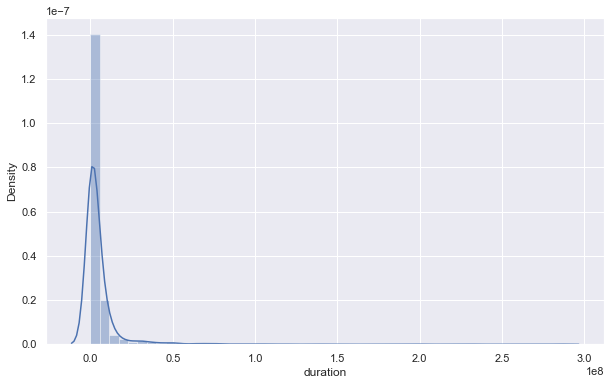

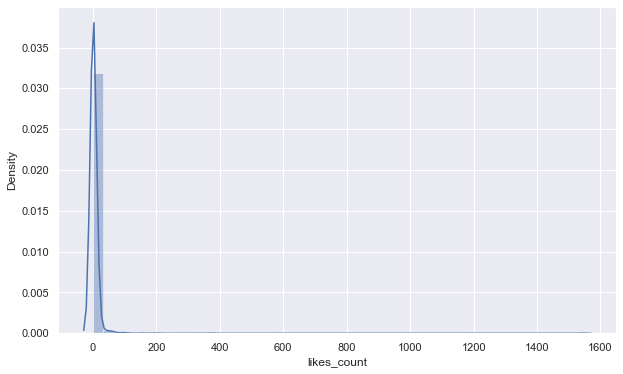

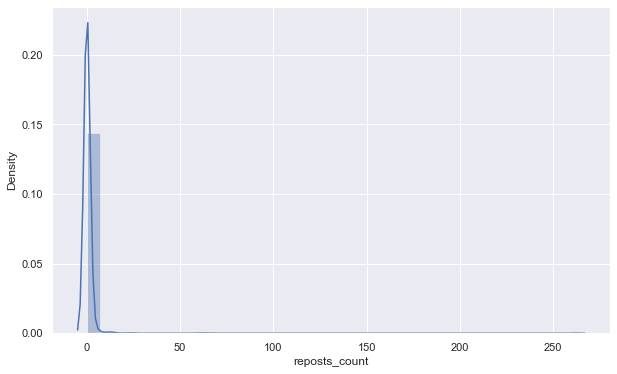

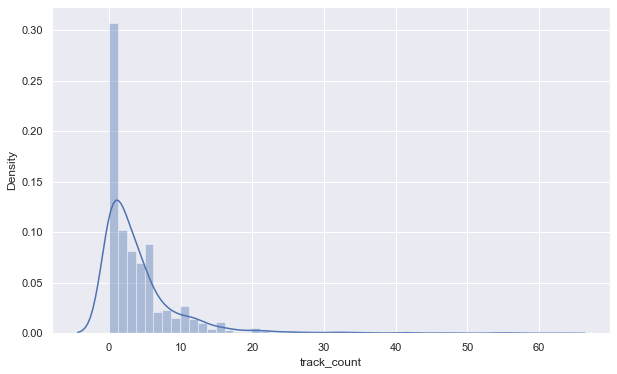

In [8]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
sb.set(rc={"figure.figsize": (10, 6)})
cols=df.select_dtypes('number').columns
for col in cols:
    sb.distplot(df[col])
    plt.show()
#sb.distplot(df['likes_count'])

- Các tương quan đa biến:
    - Ở đây, tụi em sử dụng `correlation matrix` để tìm ra sự tương quan giữa các biến chính, sau đó sử dụng biểu đồ dạng `heatmap` để mô hình hoá ma trận vừa tìm được. 

In [9]:
corr_matrix=df.corr()
corr_matrix

,duration,likes_count,reposts_count,is_album,track_count
duration,1.000000,0.090257,0.078174,-0.100378,0.439010
likes_count,0.090257,1.000000,0.994259,0.046156,0.121882
reposts_count,0.078174,0.994259,1.000000,0.045895,0.101707
is_album,-0.100378,0.046156,0.045895,1.000000,0.046134
track_count,0.439010,0.121882,0.101707,0.046134,1.000000


<AxesSubplot:>

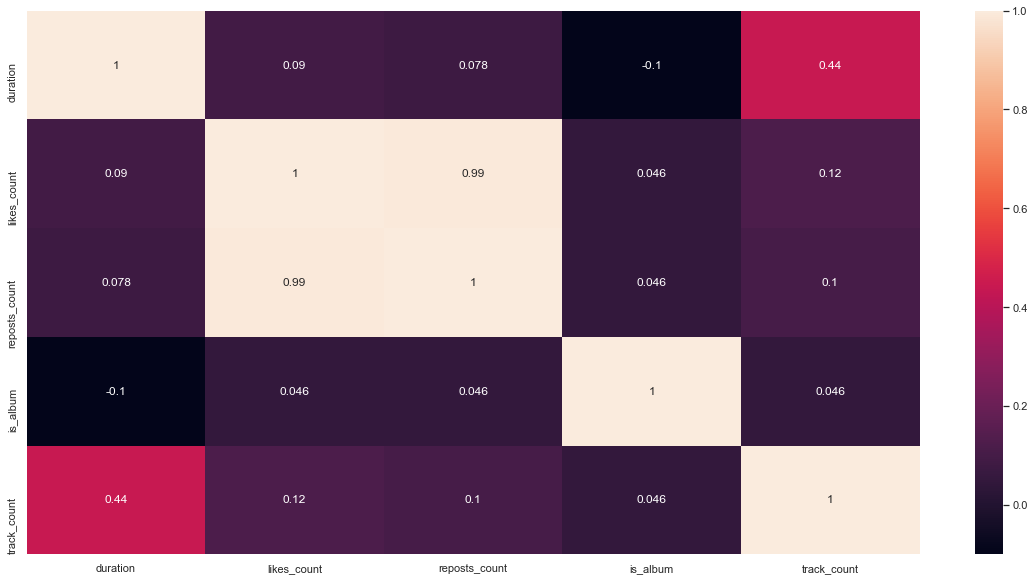

In [10]:
plt.figure(figsize=[20,10])
sb.heatmap(df.corr(),annot=True)

- Dựa vào ma trận quan hệ trên, ta có thể rút ra kết luận cho các câu hỏi đã đặt ra bên trên như sau: 
    - `reposts_count` - `likes_count`: có mối quan hệ tương quan dương và hệ số tương quan lớn (0.99), gần như đạt được đồng biến tuyệt đối, có nghĩa rằng `reposts_count` - `likes_count` quan hệ đồng biến với nhau. 
    - `track_count` - `duration`: có mối quan hệ tương quan dương và hệ số tương quan tương đối lớn (0.44), có nghĩa rằng `track_count` - `duration` quan hệ đồng biến với nhau nhưng ở mức độ trung bình - khá. 

### Câu hỏi 1: Lượt like và repost của một playlist có liên quan tới nhau?

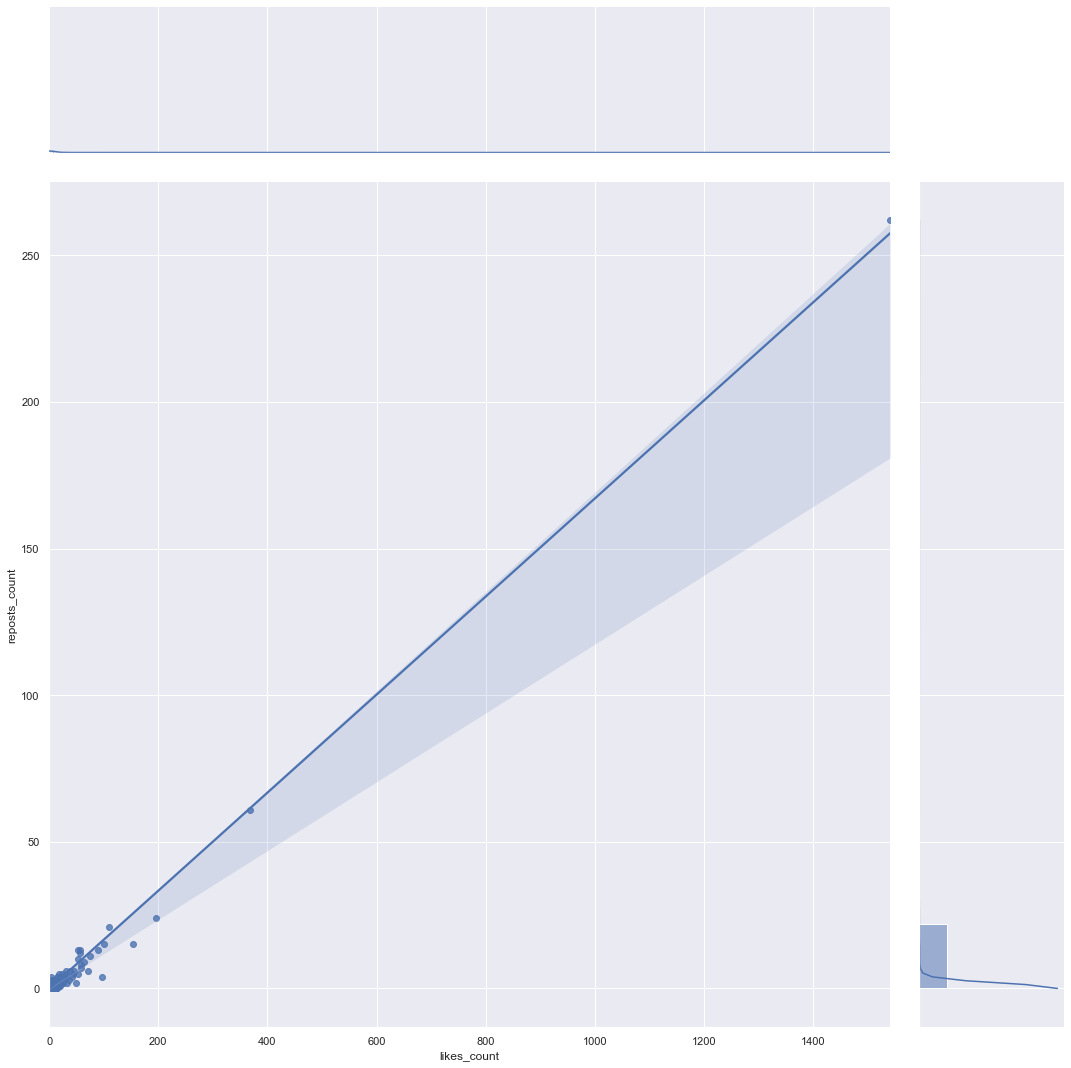

In [11]:
data = df[["likes_count", "reposts_count"]]
sb.jointplot(data=data, x="likes_count", y="reposts_count",kind = "reg", height = 15)
plt.show()

- Nhìn vào biểu đồ trên, ta có thể hình dung được rằng `likes_count` và `reposts_count` có quan hệ với nhau, nhưng do giá trị của các đặc trưng có trong bộ dữ liệu đang xét nhỏ, nên ta thấy rằng các điểm mô tả tập trung gần về giá trị gốc $(0,0)$. Ở đây, tụi em chọn thêm dạng phát hoạ là "reg" tương ứng với regression (hồi quy) để thể hiện rõ hơn tương quan giữa cặp biến này. Theo kết quả trực quan hoá nhận được, ta có thể kết luận rằng `likes_count` và `reposts_count` tỉ lệ thuận với nhau. 


### Câu hỏi 2: Tổng số playlists qua từng thời kì (tháng, năm)?

In [12]:
#Tien xu ly du lieu
month_year=pd.to_datetime(df['display_date'])
month_year = month_year.apply(lambda x: x.strftime('%Y-%B')) 
month_year

0          2008-April
1          2008-April
2            2008-May
3            2008-May
4            2008-May
            ...      
1503    2009-February
1504    2009-February
1505    2009-February
1506    2009-February
1507    2009-February
Name: display_date, Length: 1508, dtype: object

In [13]:
#Khai thac du lieu
survey_year_playlist = pd.DataFrame(np.array([np.array(df['id']),month_year]).T,columns=['count_playlists','month_year'])

survey_year_playlist = survey_year_playlist.groupby(['month_year']).sum()
survey_year_playlist

,count_playlists
month_year,
2008-April,19
2008-August,36758
2008-December,575850
2008-July,25188
2008-June,2066
2008-May,1345
2008-November,460292
2008-October,362021
2008-September,89965


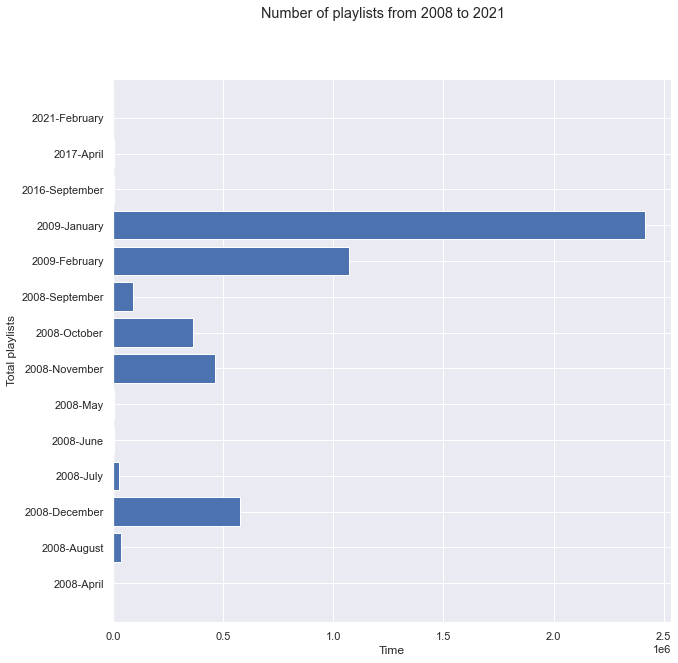

In [14]:
#Ve bieu do
plt.figure(figsize=(10,10))
x=survey_year_playlist.index.get_level_values('month_year')
y=survey_year_playlist['count_playlists']
plt.barh(x,y)
plt.xlabel("Time")
plt.ylabel("Total playlists")
plt.suptitle('Number of playlists from 2008 to 2021')
plt.show()

Trong bộ dữ liệu này, tổng số playlist được tạo tăng theo thời gian và đạt nhiều nhất vào tháng 1-2009. Tuy nhiên vẫn có khoảng thời gian ở giữa giai đoạn này mà số lượng playlist được tạo thấp hơn những tháng trước đó. Đặc biệt sau tháng 1-2009, số lượng playlist rất ít và có xu hướng giảm dần. Do đó có thể thấy số lượng playlist không hoàn toàn tỉ lệ thuận với thời gian.

### Câu hỏi 3: Số track càng nhiều thì thời lượng playlist càng lâu?

Tiền xử lý dữ liệu:
- Thực hiện chuyển giá trị của cột `duration` từ millisecond thành second. 

In [15]:
import copy
df_2 = copy.deepcopy(df)
df_2["duration"] = df_2["duration"]/100000

Vẽ biểu đồ

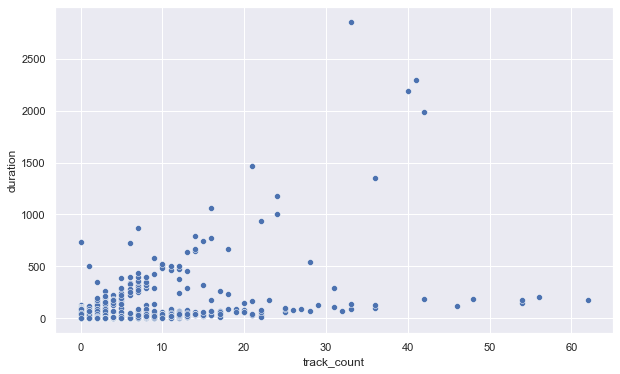

In [16]:
timing_df = df_2[["track_count", "duration"]]
sb.scatterplot(data=timing_df, x="track_count", y="duration")
plt.show()

Dựa vào biểu đồ, ta thấy phần lớn các điểm mô tả tập trung gần về toạ độ gốc, chứng tỏ rằng các playlist có số lượng track nhỏ thì thời gian cũng nhỏ. Tuy nhiên, biểu đồ vẫn có các điểm mà tại đó thời lượng rất lớn nhưng số track lại nằm ở mức trung bình. Do đó, ta thấy rằng `track_count` và `duration` có tỉ lệ thuận với nhau, nhưng vẫn còn tồn tại các ngoại lệ. 